# Over-/Underfitting

Whenever we train a ML model based on data we make assumptions about it's correctness and the accuracy of the predictions it makes.

Then we tend to adjust the model by reducing features, performing feature selection or feature engineering. But sometimes that isn't enough and our model still gives us poor results.

This is where the terms over- and underfitting come in place.

Undefitting is also called High Bias and overfitting is called High Variance. 

Immagine a dataset of two different classes

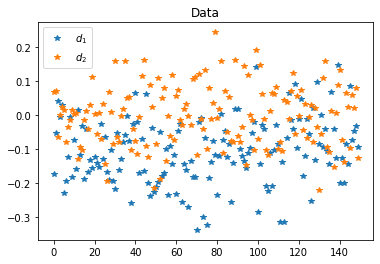

In [1]:
import numpy as np
import matplotlib.pyplot as plt


A = np.random.normal(0, 0.1, 150) - 0.1
B = np.random.normal(0, 0.1, 150)
df = np.zeros(shape=(len(B), 2))

df[:,0] = A
df[:,1] = B
x = np.linspace(0, len(A))

plt.title('Data')
plt.plot(df, '*')
plt.legend(['$d_1$', '$d_2$'])
plt.show()

Then a underfitted model might look like this

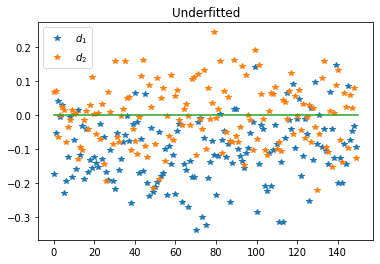

In [2]:
y = lambda x: 0.0 * np.ones(x.shape)

plt.title('Underfitted')
plt.plot(df, '*')
plt.plot(x, y(x))
plt.legend(['$d_1$', '$d_2$'])
plt.show()


A fitting model like

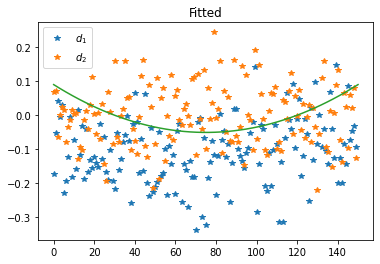

In [3]:
y_2 = lambda x: 0.000025 * (x - len(A)/2)**2 - 0.05
plt.title('Fitted')
plt.plot(df, '*')
plt.plot(x, y_2(x))
plt.legend(['$d_1$', '$d_2$'])
plt.show()


And an overfitted model like

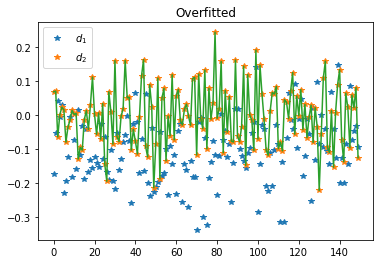

In [4]:
y_3 = lambda x: x
plt.title('Overfitted')
plt.plot(df, '*')
plt.plot(y_3(B))
plt.legend(['$d_1$', '$d_2$'])
plt.show()

By looking at the graphs above we can predict that the lines behave differently to each other. The Underfitted graph seems not to cover all data points, such models tend to cause underfitting of data.

The last graph, shows the predicted line covers all points in the graph. Such condition might cause assumptions that the model fits perfectly, but that's actually false, the graph also includes noise and outliners. These kind of fitted models tend to predict poor results due to its complexity.

The second graph seems to predict the data quite well. It covers the majority of points and also maintains the balance between bias and variance.

## Difference between underfitting and overfitting

Since we want to predict and classify data in a more generalized way, we need to generalize our model to solve the problem of over and underfitting. Which means in a statistical way, how well our model fits the data set such that it gives proper accurate predictions as expected.
Bias is reduced and variance is increased in relation to model complexity. AS more and more parameters are added to a model, the complexity of the model rises and variance becomes our primary concern, while bias steadily falls.

So what is actually the *Bias*?

The Bias gives us how close our predictive model is to training data after averaging predict values. Generally algorithms have high bias, which help them to learn fast and easy to understand but are less flexible. That looses its ability to predict complext problems, so it fails to explain the algorithm bias. This results in underfitting of the model.
**This can't be solved by having more training data**

The Varaince is defined as deviation of predictions, in simple it is the amout which telss us when its point data value changes or if a different data is used how much the predicted value will be affected for the same model or for a different model respectively. Ideally, the models predicted value should remain the same even changing from one training data set to another, but if the model has high variance the model prediction values are affected by the value of the datasets.

Both, Varaince and Bias can be visualized using the error during each training epoch.

## How to overcome false fitted models?

To overcome the overfitting and underfitting problem we have to look at each of them separately.

### Underfitting
In order to overcome underfitting we need to model the expected value of the target variable as an $n$-th degree polynomial yielding the general Polynomial.
The training error will tend to decrease as we increase the degree $d$ of the polynomial.
The $n$-th polynomial in one variable is given by
$$
y = \beta_0 + \beta_1 x + \beta_2x^2 + \ldots + \beta_n x^n + \epsilon
$$
Also the cross validation error will tend to decrease as we increase $d$ up to a point and will then start to increase, forming a convex curve.  
The concept of implementing this model is Polynomial Regression, which is build in into `scikit-learn`.

### Overfitting
To solve the problem of overfitting the flexibility of the model needs to be increased or decreased. Too much flexibility can also spoil the model, so we need to find the golden ratio here.  
There are three types of regularization techniques to solve overfitting. Each of the techniques defines a function $P$, which is the regularization added to the cost function $J$. And $J$ is the function we train our model on and try to minimize in (S)GD.
1. L1 regularization (Lasso regression)
  - Least absolute shrinkable and selection operator
  - given through
  $$
  P = \alpha \sum \limits_{n=1}^N |\theta_n|\\
  J(\theta) = \frac{1}{2m} \sum \limits_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \alpha \sum\limits_{n=1}^N |\theta_n|
  $$
  where $P$ represents the penalty we fit the model to and $J$ the cost function. $\alpha$ is the learning rate.
  - overcomes the disadantage of [ridge Regression](https://en.wikipedia.org/wiki/Ridge_regression)
  - might cause features to be ignored internally, which gives a huge advantage
  - if $p>n$ for $p$ number of features and $n$ number of train and test samples, the lasso selects at most $n$ features.   
  _The number of selected genes is bound by the number of samples._
  - Fails to perform grouped selection, tends to select one feature from a group and ignores others.
2. L2 regularization (Tikhnov regularization)
  - the penalty function $P$ and cost function $J$ are given as
  $$
  P = \alpha \sum \limits_{n=1}^N \theta_n^2\\
  J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2 + \alpha \sum\limits_{n=1}^N \theta_n^2
  $$
  - enforces the Beta function to be lower, but it doesn't enforce it to be zero.
  - won't get rid of features which aren't suitable but rather minimize their impact on the trained model.
3. elastic net
  - Implements Lasso and Ridge Regression
  - piece wise linear solution
  - $P$ given as
  $$
  P = \alpha\sum\limits_{n=1}^N|\theta_n|+(1-\alpha)\sum\limits_{n=1}^N\theta_n^2
  $$
  - The cost function
  $$
  J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2 + \alpha\sum\limits_{n=1}^N|\theta_n|+(1-\alpha)\sum\limits_{n=1}^N\theta_n^2
  $$
  - advantage: overcomes both limitations of Lasso and Ridge to some extend

## Application on iris dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests

In [6]:
# download dataset
res = requests.get("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
with open('Iris_Data.csv', 'w') as file:
  file.write(str(res.content, 'utf-8'))

In [7]:
# read in data
data = pd.read_csv("Iris_Data.csv")
data['species'] = data['variety']
del data['variety']
data.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
data['species'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: species, dtype: int64

In [9]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [22]:
# encoding string labels
data['species'] = encoder.fit_transform(data['species'])
data['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [12]:
X = data.iloc[:, 1:4]
y = data['species']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [14]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
np.set_printoptions(precision=5)

In [15]:
# regular log reg model
from sklearn.linear_model import LogisticRegression

def test_model(_X_train, _y_train, _X_test, _y_test):
  logReg = LogisticRegression()
  logReg.fit(_X_train, _y_train)

  out = logReg.predict(_X_test)

  print('Mean Squared Error is:', mean_squared_error(_y_test, out))
  print('Mean Absolute Error is:', mean_absolute_error(_y_test, out))
  print('R square is:', r2_score(_y_test, out))
  print('Accuracy score is:', accuracy_score(_y_test, out))

test_model(X_train, y_train, X_test, y_test)

Mean Squared Error is: 0.04
Mean Absolute Error is: 0.04
R square is: 0.9351070733290071
Accuracy score is: 0.96


In [16]:
# scaled dataset, expected to score lower
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

X_train_minmax = min_max.fit_transform(X_train)
X_test_minmax = min_max.fit_transform(X_test)

In [17]:
test_model(X_train_minmax, y_train, X_test_minmax, y_test)

Mean Squared Error is: 0.08
Mean Absolute Error is: 0.08
R square is: 0.8702141466580142
Accuracy score is: 0.92


Scaled data might introduce bigger outliners therefor the regular linear regression won't fit as good to upscaled data as it would for normalized data. This is where we start using the regularization techniques we learned earlier. But instead of actually implementing penalty and cost functions we use already implemented solutions of `sklearn.linear_model`, such as `Lasso` the L1 regularization. 

In [18]:
# Lasso

from sklearn.linear_model import Lasso

def test_model(_X_train, _y_train, _X_test, _y_test):
  model = Lasso(alpha=0.001, normalize=True)
  model.fit(_X_train, _y_train)
  out = model.predict(_X_test)
  print('Mean Squared Error is:', mean_squared_error(_y_test, out))
  print('Mean Absolute Error is:', mean_absolute_error(_y_test, out))
  print('R square is:', r2_score(_y_test, out))
  print('Accuracy score is:', model.score(_X_test, _y_test))

test_model(X_train, y_train, X_test, y_test)

Mean Squared Error is: 0.0449002235154059
Mean Absolute Error is: 0.1642102514661821
R square is: 0.9271573271975894
Accuracy score is: 0.9271573271975894


In [19]:
# Lasso Regularization after MinMax Preprocessing

test_model(X_train_minmax, y_train, X_test_minmax, y_test)

Mean Squared Error is: 0.045924065268259484
Mean Absolute Error is: 0.17523068689779214
R square is: 0.9254963250028236
Accuracy score is: 0.9254963250028235


As you can see using the Lasso Regression we maintain a more stable accuracy, even on scaled data.

In [20]:
# Ridge

from sklearn.linear_model import Ridge

def test_model(_X_train, _y_train, _X_test, _y_test):
  model = Ridge(alpha=0.001, normalize=True)
  model.fit(_X_train, _y_train)
  out = model.predict(_X_test)
  print('Mean Squared Error is:', mean_squared_error(_y_test, out))
  print('Mean Absolute Error is:', mean_absolute_error(_y_test, out))
  print('R square is:', r2_score(_y_test, out))
  print('Accuracy score is:', model.score(_X_test, _y_test))

test_model(X_train, y_train, X_test, y_test)

Mean Squared Error is: 0.045479541428872006
Mean Absolute Error is: 0.16608238588818933
R square is: 0.9262174863256457
Accuracy score is: 0.9262174863256457


In [21]:
# Ridge on scaled data

test_model(X_train_minmax, y_train, X_test_minmax, y_test)

Mean Squared Error is: 0.04832337651739938
Mean Absolute Error is: 0.1823589112864664
R square is: 0.9216038667790406
Accuracy score is: 0.9216038667790406


## Conclusion
Applying some ML model on datasets directly will not predict accurately as we expect and it might be a totally over- or underfitted representation of our training data. Identifying over- or underfitting and applying different regularization techniques to solve those fitting issues will increase the quality of predictions and therefore should always be considered while building a new model.